## Equipo #4 | TC3006C.102

- Karla Andrea Palma Villanueva (A01754270)
- Viviana Alanis Fraige (A01236316)
- David Fernando Armendariz Torres (A01570813)
- Alan Alberto Mota Yescas (A01753924)
- Adrián Chávez Morales (A01568679)
- Jose Manuel Armendáriz Mena (A01197583)

In [3]:
# Import libraries
import pandas as pd # Dataframe management
import re # Regular expressions
import numpy as np # Math 
import matplotlib.pyplot as plt # Plots

In [4]:
# Load & inspect trainig dataset
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Extract titles for each passanger and store them in new column
titles = []
for name in df["Name"]:
    titles.append("".join(re.findall(r',([^.]*)\.', name))[1:])
df["Titles"] = titles
df["Titles"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Titles, dtype: int64

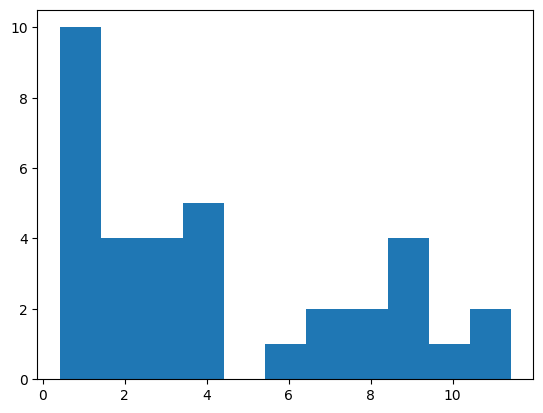

In [7]:
# Check Age distribution for "Master" Title
master_ages = df[df["Titles"] == "Master"]["Age"].dropna()
plt.hist(master_ages, bins=np.arange(master_ages.min(), master_ages.max())) # Check for outliers
master_ages_mean = master_ages.mean()

In [8]:
# Fill null ages of "Master" Title with its average
df[df["Titles"] == "Master"] = df[df["Titles"] == "Master"].fillna(value = master_ages_mean)

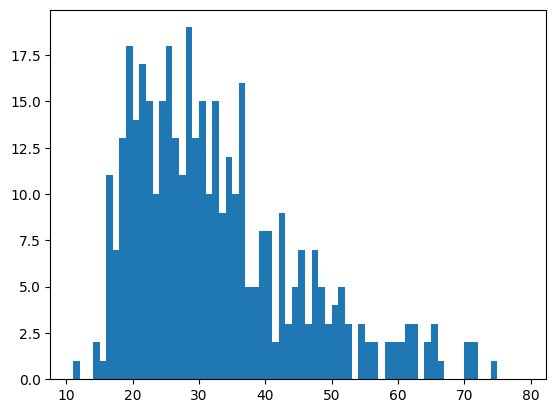

In [9]:
# Check Age distribution for "Mr" Title
mr_ages = df[df["Titles"] == "Mr"]["Age"].dropna()
plt.hist(mr_ages, bins=np.arange(mr_ages.min(), mr_ages.max())) # Check for outliers
mr_ages_mean = mr_ages.mean()

In [10]:
# Fill null ages of "Mr" Title with its average
df[df["Titles"] == "Mr"] = df[df["Titles"] == "Mr"].fillna(value = mr_ages_mean)

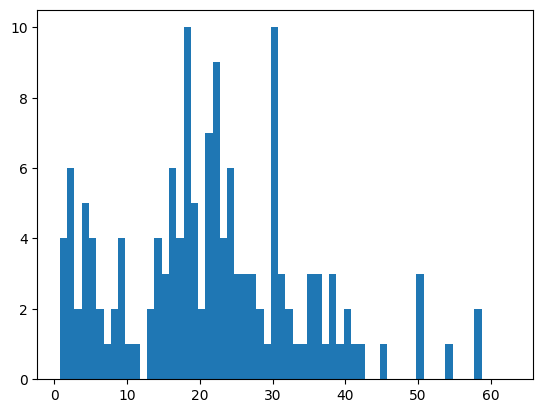

In [11]:
# Check Age distribution for "Miss" Title
miss_ages = df[df["Titles"] == "Miss"]["Age"].dropna()
plt.hist(miss_ages, bins=np.arange(miss_ages.min(), miss_ages.max())) # Check for outliers
miss_ages_mean = miss_ages.mean()

In [12]:
# Fill null ages of "Miss" Title with its average
df[df["Titles"] == "Miss"] = df[df["Titles"] == "Miss"].fillna(value = miss_ages_mean)

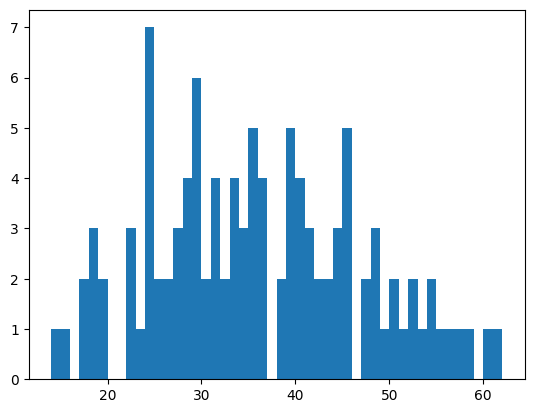

In [13]:
# Check Age distribution for "Mrs" Title
mrs_ages = df[df["Titles"] == "Mrs"]["Age"].dropna()
plt.hist(mrs_ages, bins=np.arange(mrs_ages.min(), mrs_ages.max())) # Check for outliers
mrs_ages_mean = mrs_ages.mean()

In [14]:
# Fill null ages of "Mrs" Title with its average
df[df["Titles"] == "Mrs"] = df[df["Titles"] == "Mrs"].fillna(value = mrs_ages_mean)

In [15]:
# Look for other absent values in "Age"
df[np.isnan(df["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,Dr


In [16]:
# Dr. Arthur Jackson's age was researched and filled in manually
df.loc[df["PassengerId"] == 767, "Age"] = 46 # Rounded upwards
'''
Encyclopedia Titanica (2016) Arthur Jackson Brewe (ref: #41, last updated: 8th July 2016, accessed 19th August 2024 08:31:49 AM)
URL : https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html
'''

'\nEncyclopedia Titanica (2016) Arthur Jackson Brewe (ref: #41, last updated: 8th July 2016, accessed 19th August 2024 08:31:49 AM)\nURL : https://www.encyclopedia-titanica.org/titanic-victim/arthur-jackson-brewe.html\n'

In [17]:
# Check for other absent values in relevant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        877 non-null    object 
 11  Embarked     891 non-null    object 
 12  Titles       891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [18]:
# Duplicate relevant columns into a new dataframe
df_x = df[["PassengerId", "Pclass", "Sex", "Age", "Parch", "Titles", "Survived"]].copy()
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   Parch        891 non-null    int64  
 5   Titles       891 non-null    object 
 6   Survived     891 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [19]:
# Extract target column into a new dataframe
df_y = df_x[["PassengerId", "Survived"]].copy()
df_x.drop("Survived", axis = 1, inplace = True)

# Set indexes to Passanger Id
df_y.set_index("PassengerId", inplace=True)
df_x.set_index("PassengerId", inplace=True)

In [20]:
# Categorize "Sex"
df_x.loc[df_x["Sex"] == "male", "Sex"] = 0
df_x.loc[df_x["Sex"] == "female", "Sex"] = 1

In [21]:
# One hot encode "Titles", titles have been grouped based on relevance and equivalence
df_x['Mr'] = df_x['Titles'] == 'Mr' # Mr
df_x['Miss'] = (df_x['Titles'] == 'Miss') | (df_x['Titles'] == 'Mlle') | (df_x['Titles'] == 'Ms') # Miss and equivalents
df_x['Mrs'] = df_x['Titles'] == 'Mrs' # Mrs
df_x['Master'] = df_x['Titles'] == 'Master'# Master
df_x['Social Worker'] = (df_x['Titles'] == 'Dr') | (df_x['Titles'] == 'Rev') # Social Workers (Not really)
df_x['Millitary'] = (df_x['Titles'] == 'Major') | (df_x['Titles'] == 'Col') | (df_x['Titles'] == 'Capt') # Millitary
df_x['Nobility'] = (df_x['Titles'] == 'Sir') | (df_x['Titles'] == 'Lady') | (df_x['Titles'] == 'Mme') | (df_x['Titles'] == 'Don') | (df_x['Titles'] == 'Jonkheer') # Nobility
df_x.drop("Titles", axis = 1, inplace = True)

In [22]:
df_x.head()

,Pclass,Sex,Age,Parch,Mr,Miss,Mrs,Master,Social Worker,Millitary,Nobility
PassengerId,,,,,,,,,,,
1,3,0,22.0,0,True,False,False,False,False,False,False
2,1,1,38.0,0,False,False,True,False,False,False,False
3,3,1,26.0,0,False,True,False,False,False,False,False
4,1,1,35.0,0,False,False,True,False,False,False,False
5,3,0,35.0,0,True,False,False,False,False,False,False


In [23]:
df_y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
